In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.spatial.distance import cdist

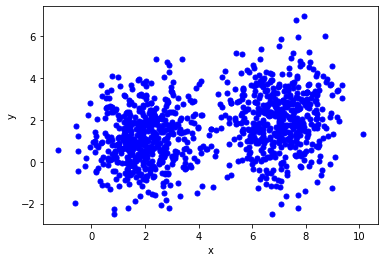

In [16]:
means = [[2, 1], [7, 2]]
cov = [[1, 0], [0, 2]]
N = 500
K = 2
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X = np.concatenate((X0, X1), axis=0)

plt.xlabel('x')
plt.ylabel('y')
plt.plot(X[:, 0], X[:, 1], 'bo', markersize=5)
plt.plot()
plt.show()

In [17]:
# khởi tạo tâm cụm
def kmeans_init_centers(X, K):
  # random k index beetween 0 and shape(X) without duplicate index.
  # Then return X[index] as cluster
    return X[np.random.choice(X.shape[0], K, replace=False)]

In [18]:
#xác định tâm cụm
def kmeans_predict_labels(X, centers):
    D = cdist(X, centers)
   # return index of the closest center
    return np.argmin(D, axis = 1)

In [19]:
#cập nhập lại tâm cụm
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
    # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
    # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

In [20]:
#kiểm tra tính hội tụ
def kmeans_has_converged(centers, new_centers):
  # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

In [21]:
#visulize dữ liệu
def kmeans_visualize(X, centers, labels, K, title):
    plt.xlabel('x') # label trục x
    plt.ylabel('y') # label trục y
    plt.title(title) # title của đồ thị
    plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'] # danh sách các màu hỗ trợ
    
    for i in range(K):
        data = X[labels == i] # lấy dữ liệu của cụm i
        plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^', markersize = 4, label = 'cluster_' + str(i)) # Vẽ cụm i lên đồ thị
        plt.plot(centers[i][0], centers[i][1],  plt_colors[i+4] + 'o', markersize = 10, label = 'center_' + str(i)) # Vẽ tâm cụm i lên đồ thị
    plt.legend() # Hiện bảng chú thích
    plt.show()

In [22]:
def kmeans(init_centes, init_labels, X, K):
    centers = init_centes
    labels = init_labels
    times = 0
    while True:
        labels = kmeans_predict_labels(X, centers)
        kmeans_visualize(X, centers, labels, K, 'Assigned label for data at time = ' + str(times + 1))
        new_centers = kmeans_update_centers(X, labels, K)
        if kmeans_has_converged(centers, new_centers):
            break
        centers = new_centers
        kmeans_visualize(X, centers, labels, K, 'Update center possition at time = ' + str(times + 1))
        times += 1
    return (centers, labels, times)

[[7.18294458 1.44196908]
 [2.05243478 2.97836608]]


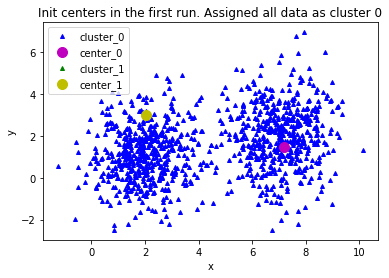

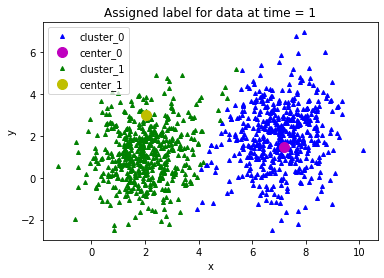

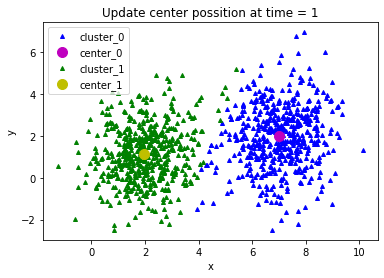

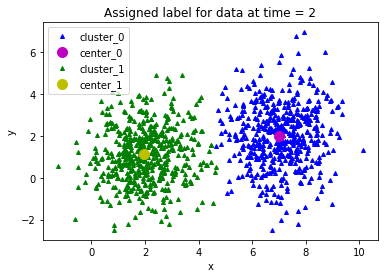

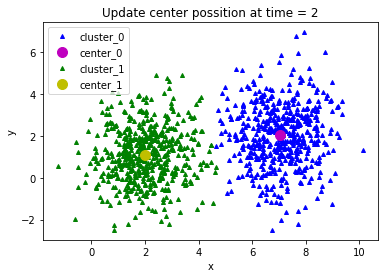

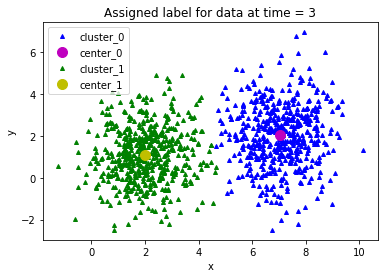

Kmeans has converged after 2 times


In [23]:
init_centers = kmeans_init_centers(X, K)
print(init_centers) # In ra tọa độ khởi tạo ban đầu của các tâm cụm
init_labels = np.zeros(X.shape[0])
kmeans_visualize(X, init_centers, init_labels, K, 'Init centers in the first run. Assigned all data as cluster 0')
centers, labels, times = kmeans(init_centers, init_labels, X, K)
 
print('Kmeans has converged after', times, 'times')